# Arca Blanca Data Science Project

I have chosen to use a dataset that has information based on crab characteristics such as weight, height, age etc.

With a background in Marine biology, I want to see if I am able to predict the age of the crab (In months) based on other metrics of the crab. The dataset was taken from Kaggle at the following URL: https://www.kaggle.com/datasets/shalfey/extended-crab-age-prediction

The CSV file is 4MBs in size with 20000+ rows giving the best chance for the model to predict the age of the crabs.

The importance of being able to predict the age of the crab based on other characteristics is crucial in the Marine Biology world. This is because knowing the age of the crab, which is a invasive species to the area (such as _Eriocheir sinensis_ in the UK), can help in researching the impact of their presence on the local ecosystem.


## Import Modules

I have imported these modules for the following reasons:
 - Pandas: This is to load the dataset and manipulate it using python.
 - Seaborn: This is to produce scatterplots and other visuals to help identify any trends. This is also used to compare the predicted values vs the test values.
 - Matplotlib: This is to be used in a function to produce multiple graphs by running one section of code.
 - Sklearn: This is to build the model.
 - Numpy: Used to create new columns with np.where()

 See below the imported modules.

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, classification_report
import numpy as np

## Functions

To help make the uploading of datasets easier and minimising the amount of repeated code.

__Function 1:__ index_col_outliers_3sd

This function was to attain the index for all rows for a specified column that would be outside of 3 Standard Deviations of the mean. This would then be use to drop them from the dataset.

__Function 2:__ give_vis_overview_sns

This function is used to produce graphs for all columns you wish to compare against the chosen prediction variable. For objects, it will create a box plot. For any numeric only values it would create a scatter plot and when comparing against itself, a histogram is used. All from the Seaborn library.

__Function 3:__ pred_crab_age

Used in the dummy model to give a value by multiplying the weight of the crab against the height of the crab.


In [3]:
### -- Function 1 ---------------------------------------------------------------------------------###

def index_col_outliers_3sd(dataframe, df_col):
    #To check whether the column that has been entered can be used in the function.
    if dataframe[df_col].dtype == 'O':
        print("Unable to use function on this column as it's dtype = object")
    else:
        #Get STD and mean of the column
        df_col_std = dataframe[df_col].std()
        df_col_mean = dataframe[df_col].mean()
        #Grabs index of all values that 3 standard deviations of the mean.
        df_value_rm_index = dataframe[(dataframe[df_col] < (df_col_mean - (df_col_std * 3))) |
                                      (dataframe[df_col] > (df_col_mean + (df_col_std * 3)))].index
    return df_value_rm_index

### -- Function 2 ---------------------------------------------------------------------------------###

def give_vis_overview_sns(data, col_data, variable):
    plotdf = data
    x_variables = col_data
    print(x_variables)

    #Creates a seperate scatter plot for each value
    for i in x_variables:
        if plotdf[i].dtype == 'O':
            sns.boxplot(x= plotdf[variable], y= plotdf[i]);
            plt.title("A Seaborn box plot of the values in the column " + i + f" against the distribution of {variable}")
            plt.show()
        elif i == variable:
            sns.histplot(x= plotdf[variable]);
            plt.title("A Seaborn histogram of " + i)
            plt.show()
        else:
            sns.scatterplot(x= plotdf[i], y= plotdf[variable]);
            plt.title("A Seaborn scatter plot of " + i + f" against {variable}")
            plt.show()

### -- Function 3 ---------------------------------------------------------------------------------###

def pred_crab_age(weight, height):
    ans = weight * height
    return ans

## Dataframe Overview and insights

Firstly, I have imported the csv file using pd.read_csv():

In [4]:
df = pd.read_csv("./train_extended.csv")

### df.head()

I ran df.head() to ensure that the data has been complied correctly.

In [5]:
df.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,M,1.5750,1.2250,0.3750,31.226974,12.303683,6.321938,9.638830,10.0
1,1,I,1.2375,1.0000,0.3750,21.885814,7.654365,3.798833,7.654365,19.0
2,2,F,1.4500,1.1625,0.4125,28.250277,11.127179,7.016501,7.257472,11.0
3,3,I,1.3500,1.0250,0.3750,21.588144,9.738053,4.110678,6.378637,9.0
4,4,I,1.1375,0.8750,0.2875,14.968536,5.953395,2.962523,3.713785,8.0


### df.shape

df.shape is used to check the number of columns and rows in the DataFrame. I can see there are 20,000 rows to start with. I will use this to check if any of the columns have null values.

In [6]:
df.shape

(200000, 10)

### df.info()

Next, I have run df.info to check the dtypes I have in the DataFrame and to check if there are any null values. From my observation all columns have 20,000 non-null values which suggests that there is no missing data.

To add, there is only 1 column that is non-numeric which is the "Sex" column.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              200000 non-null  int64  
 1   Sex             200000 non-null  object 
 2   Length          200000 non-null  float64
 3   Diameter        200000 non-null  float64
 4   Height          200000 non-null  float64
 5   Weight          200000 non-null  float64
 6   Shucked Weight  200000 non-null  float64
 7   Viscera Weight  200000 non-null  float64
 8   Shell Weight    200000 non-null  float64
 9   Age             200000 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 15.3+ MB


### df.describe()

Next I have used _df.descibe()_ to get an overview on the statistics of the DataFrame.

At a glance looking at the min values, it can be seen that the columns _'Length', 'Diameter' and 'Height'_ have a min value of 0. This will need to be ensured that later on in the process that these rows are removed.

I have also ran _df["Age"].describe()_ seperatly to have a quick glance at the statistics for it.

In [8]:
df.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,99999.500000,1.312448,1.020320,0.346028,23.123436,9.989370,4.993181,6.634229,9.950615
std,57735.171256,0.289833,0.238723,0.091179,12.597823,5.604343,2.785712,3.556733,3.217088
min,0.000000,0.000000,0.000000,0.000000,0.028349,0.014175,0.014175,0.042524,1.000000
25%,49999.750000,1.150000,0.875000,0.287500,13.154168,5.669900,2.792426,3.827183,8.000000
50%,99999.500000,1.375000,1.075000,0.362500,23.515910,9.851451,4.890289,6.803880,10.000000
75%,149999.250000,1.525000,1.200000,0.412500,32.063285,13.933779,6.959802,9.029316,11.000000
max,199999.000000,7.583491,2.250000,2.825000,80.101512,45.274152,26.124064,37.038622,29.000000


In [9]:
df["Age"].describe()

count    200000.000000
mean          9.950615
std           3.217088
min           1.000000
25%           8.000000
50%          10.000000
75%          11.000000
max          29.000000
Name: Age, dtype: float64

### df["Sex"].unique()

I have used _df["Sex"].unique()_ to check the types of values in this column. It can be seen there are 4 separate values, _'M', 'I', 'F' and '0.025'_. This shows that we have at least 1 row in which we have a outlier/unreliable data (with '0.025' not leading to any type of "Sex" for the crab).

In [10]:
df["Sex"].unique()

array(['M', 'I', 'F', '0.025'], dtype=object)

### Visual Overview

I have used the visual overview to have a look at the relationship of each variable against age. Using the seaborn library to create plots of each relationship. I have dropped 'id' from the visual overview as the values have no impact on the characteristics of the crab.

__"Sex" box plot__: Shows the outlier '0.025'; the distribution of age for females is greater than males; the median age of females is larger than the median for males.

__"Length" scatter plot__: Can be clearly seen that length values over 2.5 are outliers; seems to show a positive correlation between Age and Length.

__"Diameter" scatter plot__: Can be clearly seen that diameter values over 1.7 are outliers; seems to show a positive correlation between Age and Diameter.

__"Height" scatter plot__: Can be clearly seen that height values over 1.0 are outliers; seems to show a positive correlation between Age and Height.

__"Weight" scatter plot__: No clear weight outliers; seems to show a positive correlation between Age and Weight.

__"Shucked Weight" scatter plot__: Looks like some shucked weight values over 40 are outliers; seems to show a positive correlation between Age and Shucked Weight.

__"Viscera Weight" scatter plot__: Can be clearly seen that viscera weight values over 20 are outliers; seems to show a positive correlation between Age and Viscera Weight.

__"Shell Weight" scatter plot__: Can be clearly seen that shell weight values over 27 are outliers; seems to show a positive correlation between Age and Shell Weight.

__"Age" histogram__: ~ 9-month-old crabs make up the largest amount of the data set.

In [11]:
sns.set(rc= {'figure.figsize': (8, 5), 'figure.dpi': 120})

In [12]:
selected_cols = list(df.columns)
selected_cols.remove('id')
print(selected_cols)

['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Age']


['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Age']


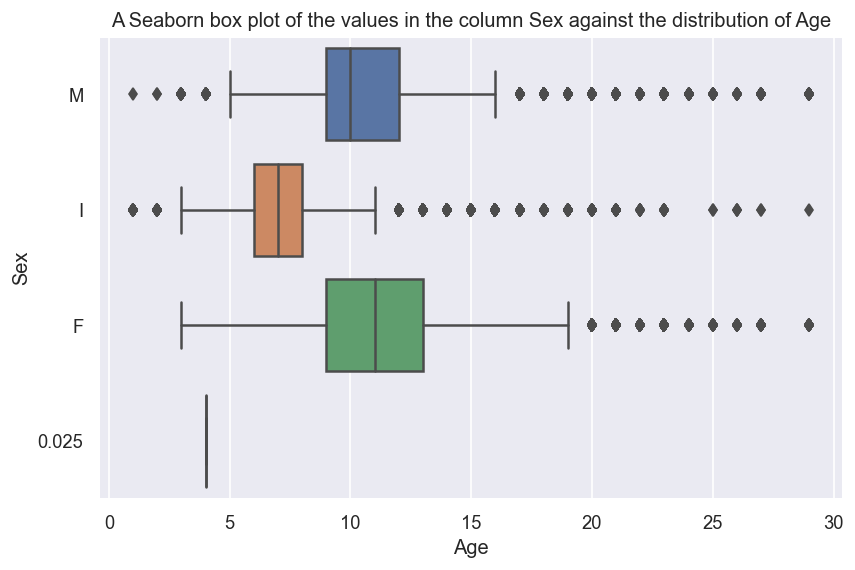

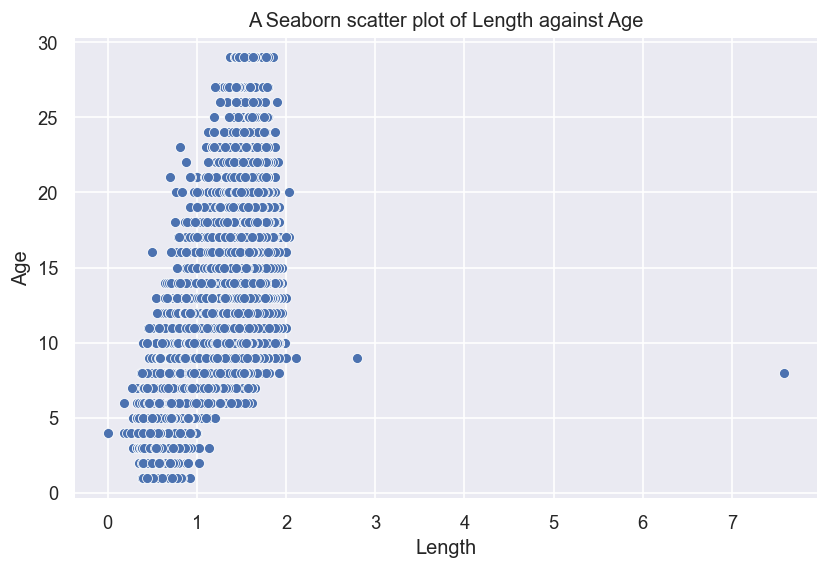

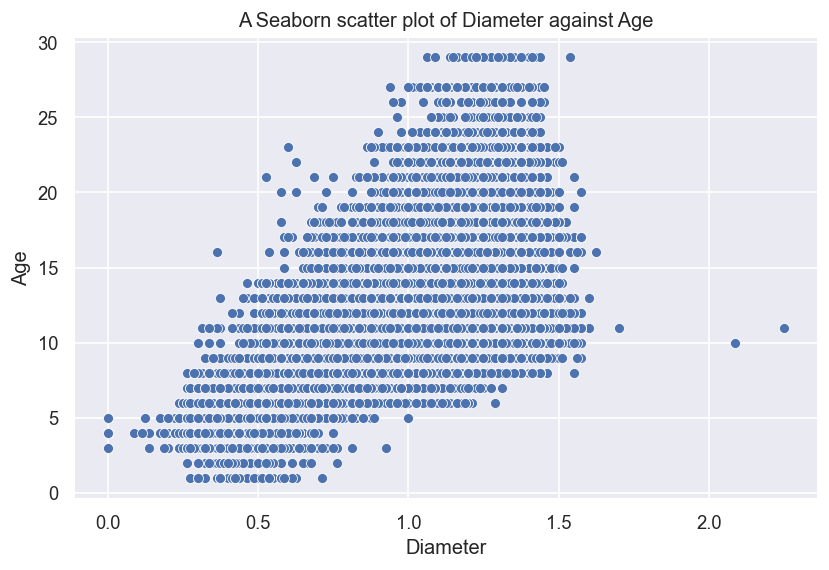

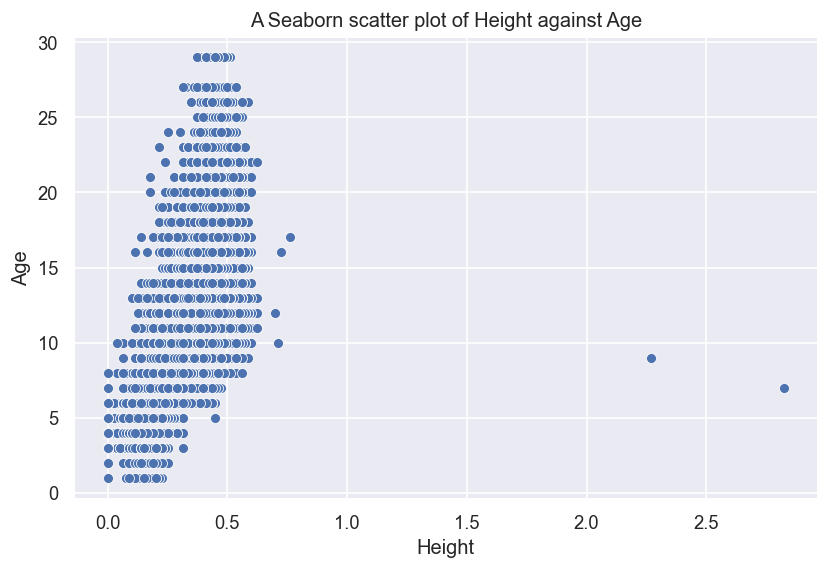

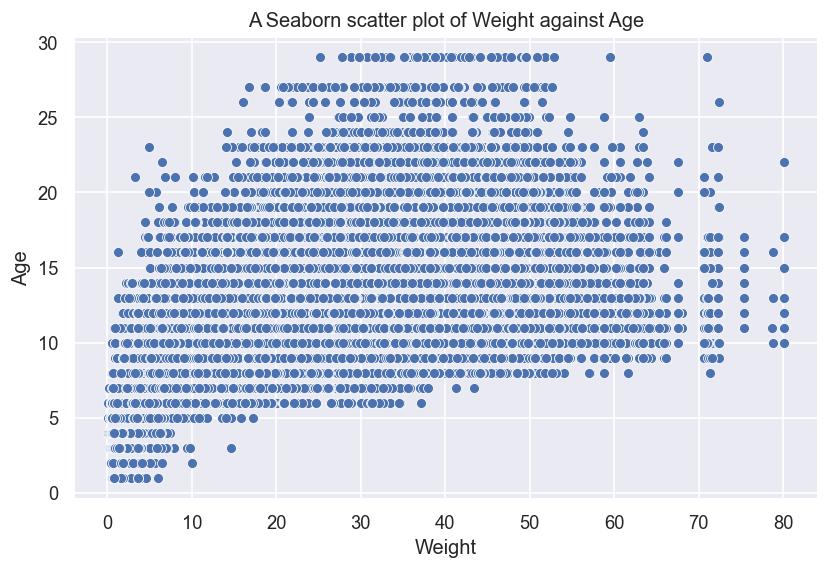

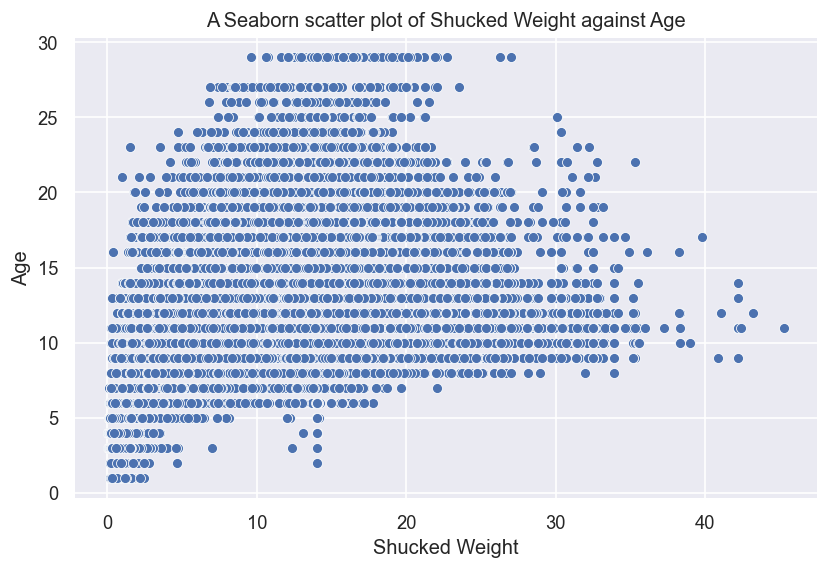

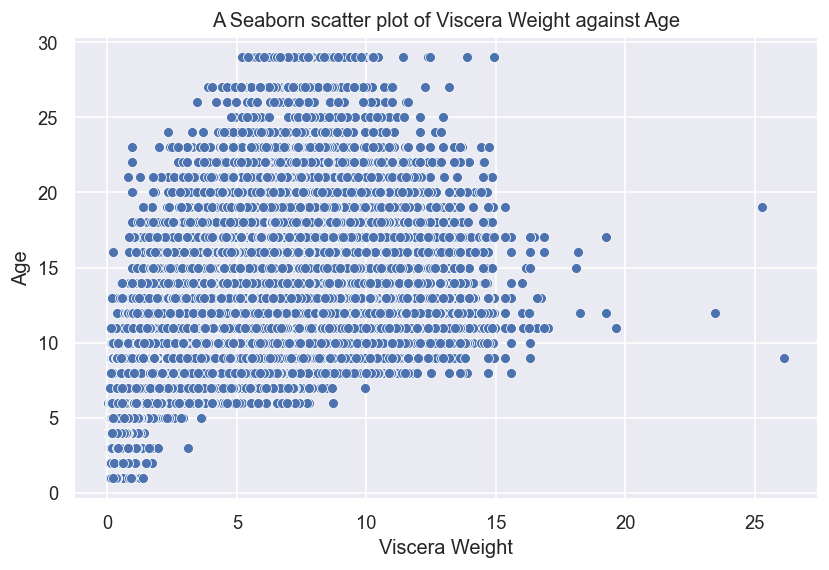

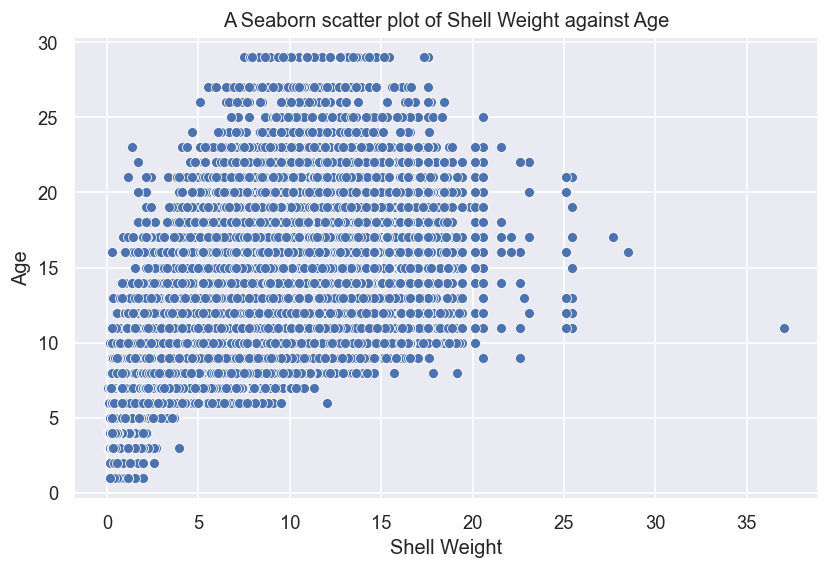

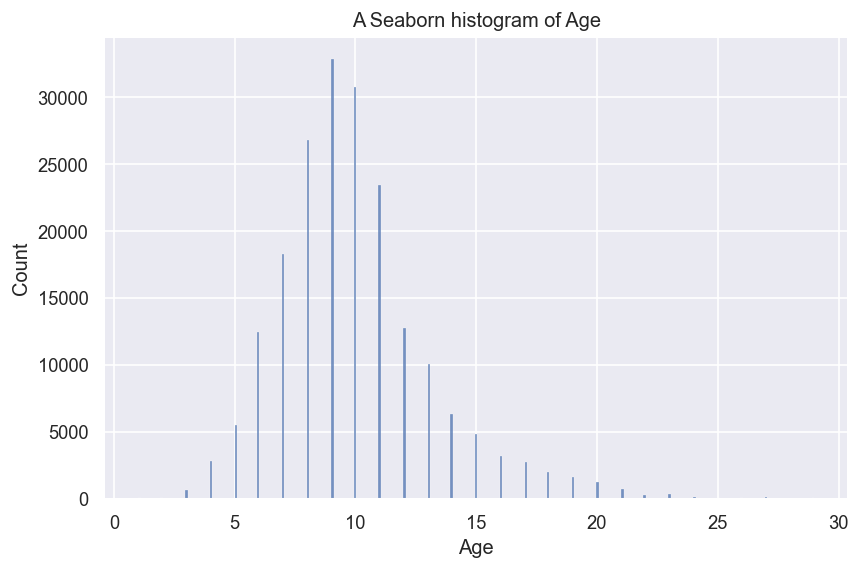

In [13]:
give_vis_overview_sns(data= df, col_data= selected_cols, variable= "Age")

## Outliers and Data Cleaning

For outliers, I am looking to remove values from each column that are greater than/ less than 3 standard deviations of their respective means. Below I will do it for each column and see how many rows this will take out (column by column). As some outliers may take out the same row, I will implement this all together to see the final result of removing the outliers.

I will also be removing '0' values that were identified earlier and the 4th category that showed up in the "Sex" column.

Number of rows indexed for each column:
__Sex__: 1
__Length__: 1295
__Diameter__: 869
__Height__: 488
__Weight__: 518
__Shucked Weight__: 812
__Viscera Weight__: 660
__Shell Weight__: 730
__Age__: 2938

Total number of rows removed:

200,000 - 193,976 = 6,024

3.012% of the Data Removed.

__Sex__

In [14]:
# Index all values in the specified column
df_sex_outliers_index = df[(df["Sex"] == "0.025")].index

#Check the number of rows that would be removed
print("Number of outliers: " + str(len(df_sex_outliers_index)))
print(df_sex_outliers_index)

# Remove outliers from the DataFrame
df_out_inprogress = df.drop(df_sex_outliers_index)
df_out_inprogress.shape

Number of outliers: 1
Index([125049], dtype='int64')


(199999, 10)

__Length__

In [15]:
# Index all values that fall outside 3 Standard Deviations of the mean
df_length_outliers_index = index_col_outliers_3sd(df, "Length")
# Ensure all values at '0' are Indexed
df_length_outliers_index.append(df[(df["Length"] == 0)].index)

# Check number of rows that would be removed
print("Number of outliers: " + str(len(df_length_outliers_index)))

# Remove outliers from the DataFrame
df_out_inprogress = df_out_inprogress.drop(df_length_outliers_index, errors= "ignore")
df_out_inprogress.shape

Number of outliers: 1295


(198705, 10)

__Diameter__

In [16]:
# Indexed all values that fall outside 3 Standard Deviations of the mean
df_diameter_outliers_index = index_col_outliers_3sd(df, "Diameter")
# Ensure all values at '0' are Indexed
df_diameter_outliers_index.append(df[(df["Diameter"] == 0)].index)

# Check number of rows that would be removed
print("Number of outliers: " + str(len(df_diameter_outliers_index)))

# Remove outliers from the DataFrame
df_out_inprogress = df_out_inprogress.drop(df_diameter_outliers_index, errors= "ignore")
df_out_inprogress.shape

Number of outliers: 869


(198617, 10)

__Height__

In [17]:
# Indexed all values that fall outside 3 Standard Deviations of the mean
df_height_outliers_index = index_col_outliers_3sd(df, "Height")
# Ensure all values at '0' are Indexed
df_height_outliers_index.append(df[(df["Height"] == 0)].index)

# Check number of rows that would be removed
print("Number of outliers: " + str(len(df_height_outliers_index)))

# Remove outliers from the DataFrame
df_out_inprogress = df_out_inprogress.drop(df_height_outliers_index, errors= "ignore")
df_out_inprogress.shape

Number of outliers: 488


(198438, 10)

__Weight__

In [18]:
# Indexed all values that fall outside 3 Standard Deviations of the mean
df_weight_outliers_index = index_col_outliers_3sd(df, "Weight")

# Check number of rows that would be Indexed
print("Number of outliers: " + str(len(df_weight_outliers_index)))

# Remove outliers from the DataFrame
df_out_inprogress = df_out_inprogress.drop(df_weight_outliers_index, errors= "ignore")
df_out_inprogress.shape

Number of outliers: 518


(197926, 10)

__Shucked Weight__

In [19]:
# Index all values that fall outside 3 Standard Deviations of the mean
df_shkdweight_outliers_index = index_col_outliers_3sd(df, "Shucked Weight")

# Check number of rows that would be Indexed
print("Number of outliers: " + str(len(df_shkdweight_outliers_index)))

# Remove outliers from the DataFrame
df_out_inprogress = df_out_inprogress.drop(df_shkdweight_outliers_index, errors= "ignore")
df_out_inprogress.shape

Number of outliers: 812


(197492, 10)

__Viscera Weight__

In [20]:
# Index all values that fall outside 3 Standard Deviations of the mean
df_visweight_outliers_index = index_col_outliers_3sd(df, "Viscera Weight")

# Check number of rows that would be Indexed
print("Number of outliers: " + str(len(df_visweight_outliers_index)))

# Remove outliers from the DataFrame
df_out_inprogress = df_out_inprogress.drop(df_visweight_outliers_index, errors= "ignore")
df_out_inprogress.shape

Number of outliers: 660


(197248, 10)

__Shell Weight__

In [21]:
# Index all values that fall outside 3 Standard Deviations of the mean
df_shlweight_outliers_index = index_col_outliers_3sd(df, "Shell Weight")

# Check number of rows that would be Indexed
print("Number of outliers: " + str(len(df_shlweight_outliers_index)))

# Remove outliers from the DataFrame
df_out_inprogress = df_out_inprogress.drop(df_shlweight_outliers_index, errors= "ignore")
df_out_inprogress.shape

Number of outliers: 730


(196761, 10)

__Age__

In [22]:
# Index all values that fall outside 3 Standard Deviations of the mean
df_age_outliers_index = index_col_outliers_3sd(df, "Age")

# Check number of rows that would be Indexed
print("Number of outliers: " + str(len(df_age_outliers_index)))

# Remove outliers from the DataFrame
df_cleaned = df_out_inprogress.drop(df_age_outliers_index, errors= "ignore")
df_cleaned.shape

Number of outliers: 2938


(193976, 10)

### Give visual overview of the cleaned DataFrame

Conducted a check on the cleaned DataFrame to ensure there are no other obvious error in the DataFrame and that trends are still following a similar path.

In the cleaned data set, no 'Null' values are present.

In [23]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193976 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              193976 non-null  int64  
 1   Sex             193976 non-null  object 
 2   Length          193976 non-null  float64
 3   Diameter        193976 non-null  float64
 4   Height          193976 non-null  float64
 5   Weight          193976 non-null  float64
 6   Shucked Weight  193976 non-null  float64
 7   Viscera Weight  193976 non-null  float64
 8   Shell Weight    193976 non-null  float64
 9   Age             193976 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 16.3+ MB


In [24]:
df_cleaned.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,193976.000000,193976.000000,193976.000000,193976.000000,193976.000000,193976.000000,193976.000000,193976.000000,193976.000000
mean,99977.423692,1.312142,1.019886,0.345367,22.828097,9.890173,4.938253,6.534669,9.796794
std,57707.807414,0.277637,0.229339,0.087001,12.068286,5.382876,2.683930,3.377596,2.858196
min,0.000000,0.450000,0.312500,0.075000,0.326019,0.141747,0.077560,0.113398,1.000000
25%,50005.750000,1.150000,0.875000,0.287500,13.154168,5.669900,2.806601,3.827183,8.000000
50%,99973.500000,1.375000,1.075000,0.362500,23.260765,9.823102,4.861939,6.747181,9.000000
75%,149895.250000,1.525000,1.200000,0.412500,31.751440,13.834556,6.903103,8.930093,11.000000
max,199999.000000,1.950000,1.700000,0.600000,60.696280,26.790277,13.338440,17.300963,19.000000


['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Age']


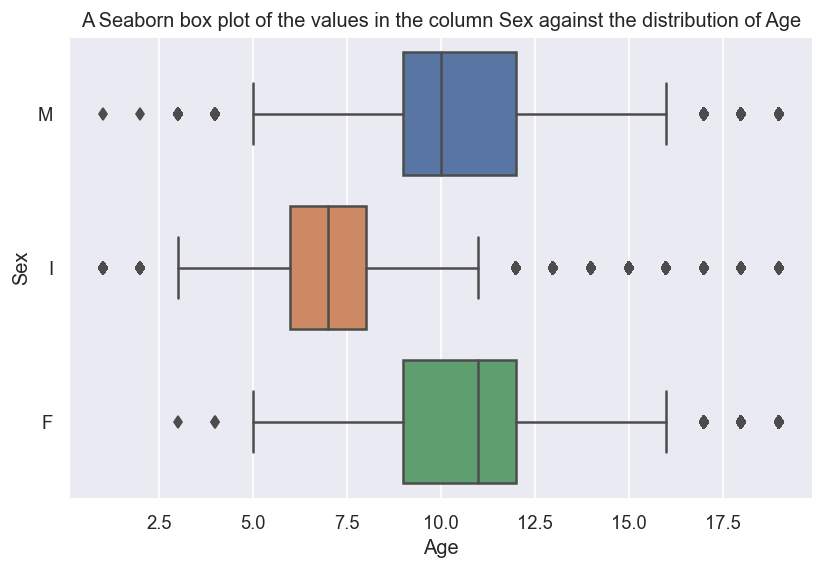

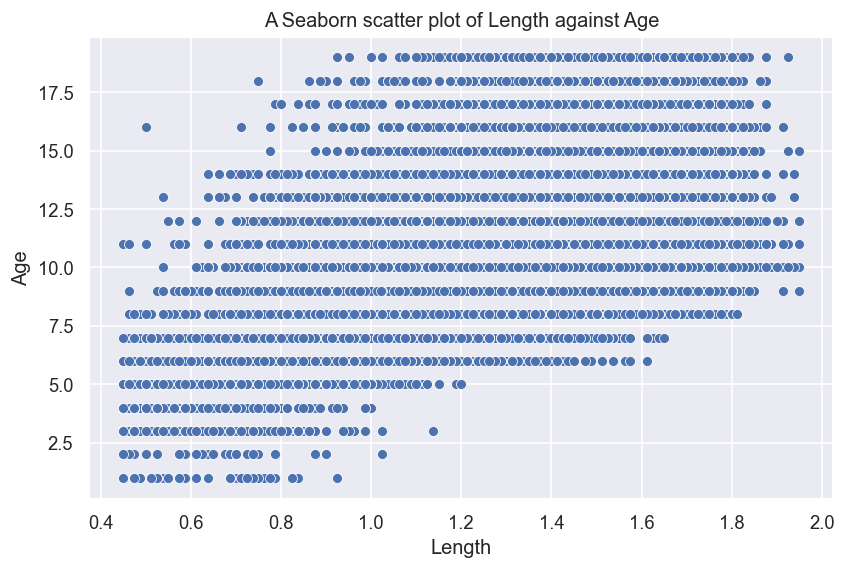

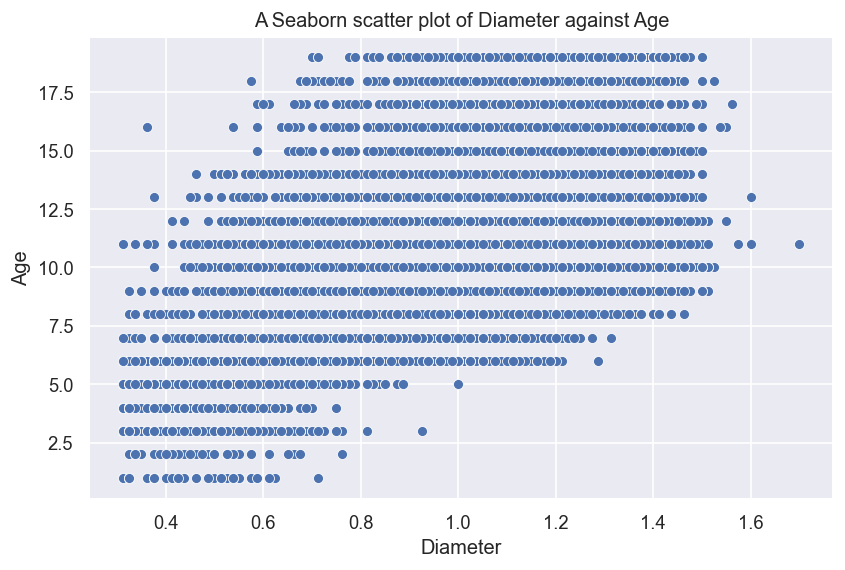

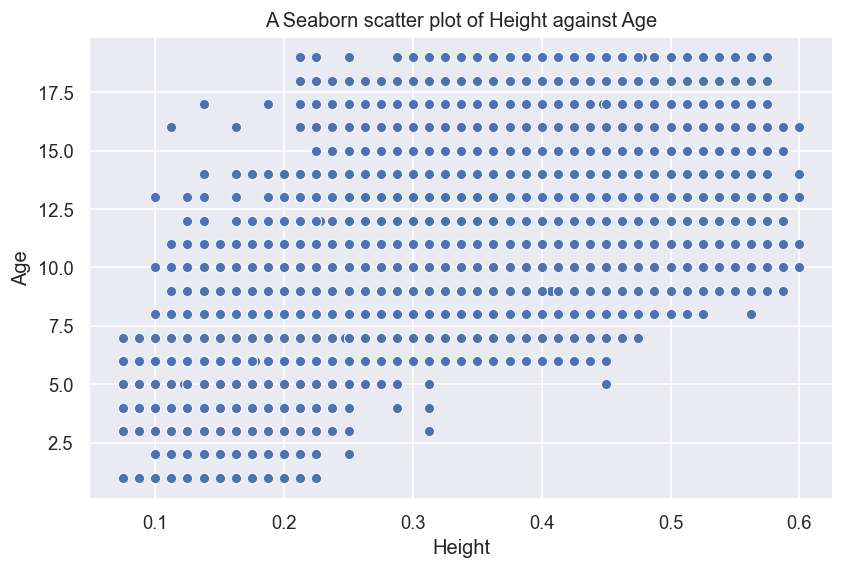

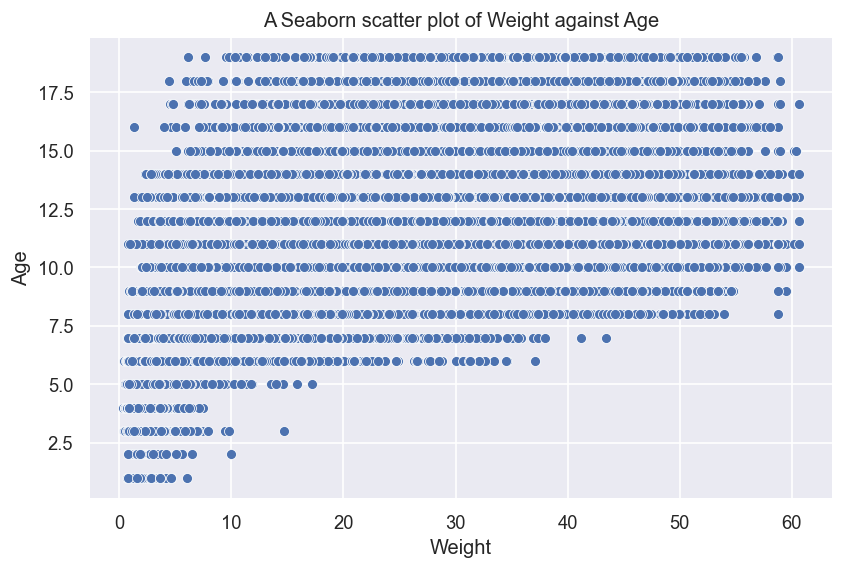

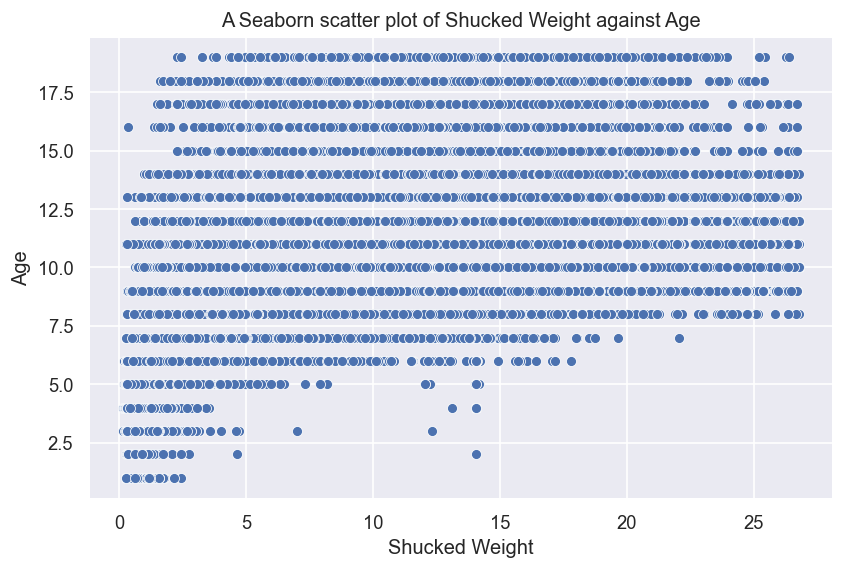

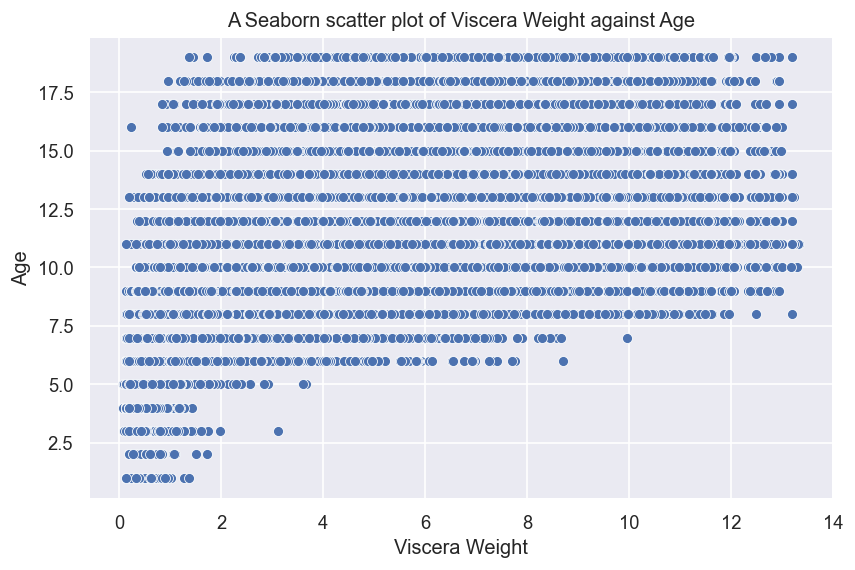

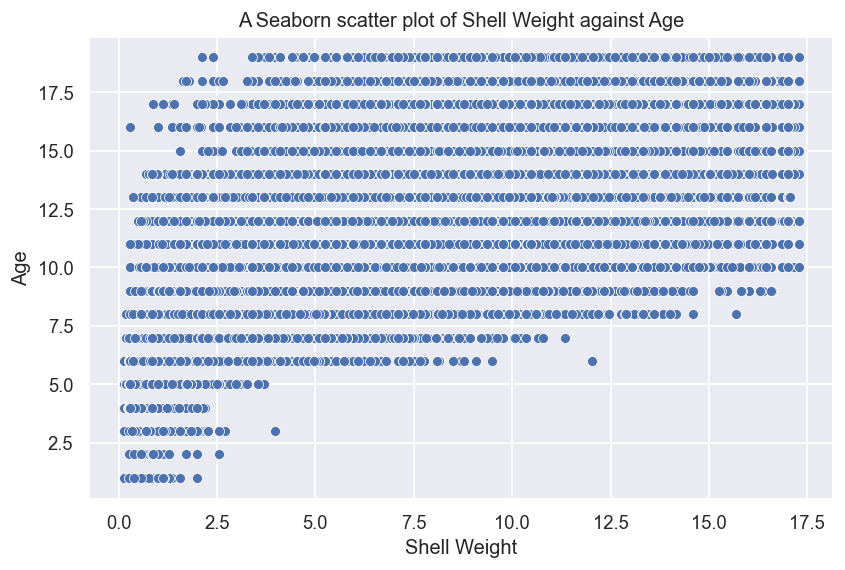

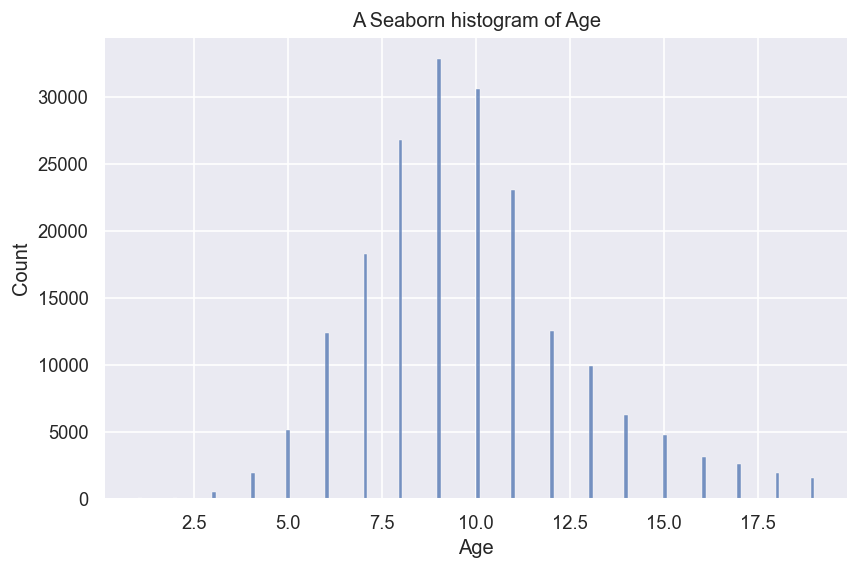

In [25]:
give_vis_overview_sns(data= df_cleaned, col_data= selected_cols, variable= "Age")

## Creating baseline dummy model

For the Dummy Model, I have multiplied the crab weight by the height to see how close that is to the age.

Then I have produced an accuracy score of the dummy model. This model produced a score of 6.03%.

The first step was converting the relevant columns in the DataFrame into a list.

In [26]:
#Actual Values
crab_weight = list(df_cleaned["Weight"])
crab_height = list(df_cleaned["Height"])

Next to create the predictions, each item of the 2 list is multiplied together and then converted from a float into an integer. This is stored in the variable __pred_list__.

In [27]:
pred_list = []

for i in range(len(crab_weight)):
    prediction = pred_crab_age(crab_weight[i], crab_height[i])
    int_pred = int(prediction)
    pred_list.append(int_pred)

pred_list

[11,
 8,
 11,
 8,
 4,
 11,
 13,
 18,
 8,
 6,
 15,
 0,
 6,
 2,
 15,
 8,
 20,
 9,
 4,
 19,
 10,
 3,
 7,
 8,
 1,
 16,
 11,
 4,
 12,
 5,
 20,
 9,
 5,
 0,
 7,
 3,
 0,
 12,
 3,
 9,
 10,
 7,
 11,
 10,
 9,
 17,
 17,
 9,
 12,
 0,
 0,
 16,
 14,
 2,
 13,
 15,
 4,
 12,
 3,
 3,
 14,
 2,
 8,
 4,
 8,
 7,
 2,
 1,
 12,
 13,
 2,
 0,
 5,
 2,
 8,
 11,
 9,
 8,
 7,
 7,
 5,
 12,
 10,
 14,
 11,
 1,
 3,
 6,
 1,
 17,
 15,
 9,
 12,
 21,
 19,
 7,
 6,
 7,
 3,
 2,
 13,
 0,
 3,
 16,
 16,
 14,
 8,
 9,
 6,
 13,
 6,
 10,
 7,
 7,
 14,
 8,
 18,
 11,
 1,
 2,
 8,
 0,
 15,
 12,
 5,
 2,
 11,
 0,
 12,
 11,
 8,
 12,
 19,
 11,
 11,
 21,
 9,
 0,
 8,
 11,
 2,
 11,
 2,
 9,
 6,
 1,
 10,
 1,
 10,
 5,
 10,
 0,
 8,
 1,
 8,
 8,
 16,
 15,
 2,
 5,
 7,
 10,
 13,
 14,
 10,
 12,
 11,
 1,
 1,
 1,
 10,
 12,
 11,
 7,
 3,
 12,
 18,
 10,
 5,
 17,
 10,
 5,
 2,
 1,
 5,
 1,
 6,
 1,
 1,
 12,
 10,
 19,
 8,
 4,
 18,
 0,
 4,
 1,
 13,
 15,
 14,
 4,
 16,
 19,
 8,
 16,
 28,
 12,
 11,
 14,
 1,
 6,
 0,
 14,
 14,
 4,
 1,
 7,
 12,
 7,
 2,
 17,
 9,
 0,
 22,
 1

Then the true crab age values are stored in a list.

In [28]:
crab_age = list(df_cleaned["Age"])
print(crab_age)

[10.0, 19.0, 11.0, 9.0, 8.0, 10.0, 14.0, 13.0, 9.0, 10.0, 10.0, 6.0, 9.0, 7.0, 14.0, 16.0, 19.0, 9.0, 9.0, 9.0, 12.0, 6.0, 13.0, 9.0, 9.0, 11.0, 9.0, 8.0, 10.0, 9.0, 11.0, 17.0, 8.0, 5.0, 9.0, 8.0, 5.0, 15.0, 7.0, 12.0, 11.0, 8.0, 11.0, 12.0, 8.0, 9.0, 14.0, 15.0, 9.0, 5.0, 8.0, 11.0, 11.0, 8.0, 13.0, 11.0, 9.0, 11.0, 7.0, 7.0, 8.0, 10.0, 11.0, 9.0, 13.0, 8.0, 7.0, 7.0, 10.0, 9.0, 6.0, 4.0, 8.0, 10.0, 10.0, 10.0, 10.0, 8.0, 10.0, 8.0, 8.0, 10.0, 9.0, 11.0, 9.0, 7.0, 13.0, 9.0, 6.0, 12.0, 14.0, 11.0, 9.0, 11.0, 10.0, 8.0, 11.0, 15.0, 10.0, 8.0, 9.0, 5.0, 8.0, 9.0, 11.0, 11.0, 8.0, 12.0, 8.0, 10.0, 8.0, 10.0, 12.0, 10.0, 13.0, 9.0, 10.0, 10.0, 6.0, 7.0, 9.0, 4.0, 10.0, 16.0, 10.0, 7.0, 14.0, 6.0, 10.0, 10.0, 8.0, 11.0, 12.0, 9.0, 11.0, 17.0, 10.0, 4.0, 8.0, 15.0, 6.0, 10.0, 7.0, 10.0, 11.0, 6.0, 14.0, 6.0, 11.0, 11.0, 12.0, 3.0, 10.0, 7.0, 10.0, 11.0, 11.0, 13.0, 8.0, 8.0, 8.0, 10.0, 16.0, 11.0, 11.0, 12.0, 10.0, 6.0, 9.0, 7.0, 11.0, 14.0, 11.0, 11.0, 8.0, 12.0, 10.0, 18.0, 7.0, 8.0, 12.

Then to determine the accuracy score, each value in the pred_list is compared to the true values. Each time the prediction is correct, the counter increments by 1.

In [29]:
counter = 0
for i in range(len(crab_age)):
    if crab_age[i] == pred_list[i]:
        counter += 1

print(counter)

11703


Finally, to receive the accuracy score, the counter value (11703) is divided by the total amount of values to gain the percentage of predictions that were correct (i.e., the accuracy score).

In [30]:
ans = (counter / len(crab_age)) * 100

print("The Accuracy score for the dummy model is:" + str(ans) + "%")

The Accuracy score for the dummy model is:6.03322060461088%


## Numerating Categorical Values

As the "Sex" column is classified as an object. I have created new columns to indicate whether the crab was male or female (As binary). As "I" (Indeterminate) is signalling that the gender of the crab is unknown, A separate column was not created for this as this should not give any significant weight in the model.

__Note:__ OneHotEncoder could be used on this issue and was not used as it produced errors when trying not to encode "I".

In [31]:
df_cleaned["SM"] = np.where(df_cleaned["Sex"] == "M", 1, 0)
df_cleaned["SF"] = np.where(df_cleaned["Sex"] == "F", 1, 0)

In [32]:
df_cleaned.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,SM,SF
0,0,M,1.5750,1.2250,0.3750,31.226974,12.303683,6.321938,9.638830,10.0,1,0
1,1,I,1.2375,1.0000,0.3750,21.885814,7.654365,3.798833,7.654365,19.0,0,0
2,2,F,1.4500,1.1625,0.4125,28.250277,11.127179,7.016501,7.257472,11.0,0,1
3,3,I,1.3500,1.0250,0.3750,21.588144,9.738053,4.110678,6.378637,9.0,0,0
4,4,I,1.1375,0.8750,0.2875,14.968536,5.953395,2.962523,3.713785,8.0,0,0


## Creating the Logistic Regression Model

With the linear regression model failing to produce a realistic prediction (As predictions were going into the negative values), a logistic regression model has been used.

First, __X__ and __y__ are defined.

In [33]:
y = df_cleaned["Age"]
X = df_cleaned.drop(["Age", "id", "Sex"], axis = 1)

Due to the large volume of data, a test size of 30% has been used.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [35]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [36]:
log_model = LogisticRegression()

In [37]:
log_model.fit(scaled_X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
y_pred = log_model.predict(scaled_X_test)

The model outcome produced an accuracy score of 33.26%

In [39]:
accuracy_score(y_test, y_pred)

0.3330125616483082

A confusion matrix has been created showing that most of the correct predictions from the model were for crabs aged between 7-9 months. The errors in the model increase from 11 months +.

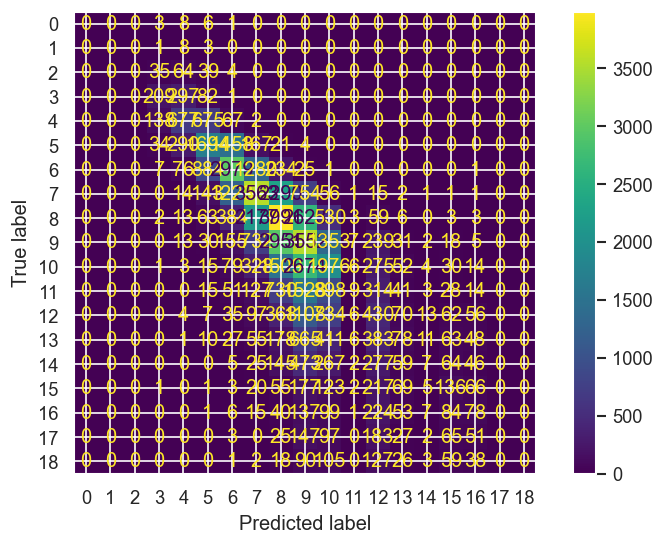

In [40]:
conf=confusion_matrix(y_test, y_pred) 

ConfusionMatrixDisplay(confusion_matrix=conf).plot();

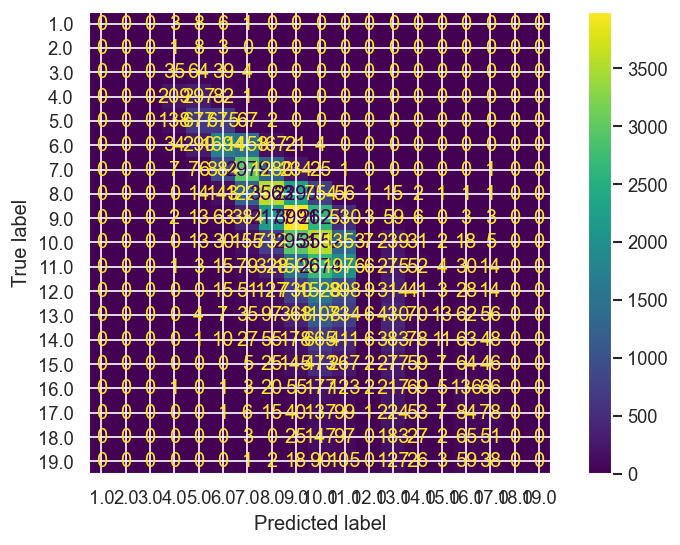

In [41]:
ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=log_model.classes_).plot();

## Evaluation

Dummy model Accuracy Score: 6.03%
Logistic model score: 33.26%

As can be seen when comparing the dummy model vs, the Logistic model that the latter has improved accuracy when predicting the age of the crab. This indicates that the model has worked however, its accuracy overall is poor. This model therefore could be used to test against other modelling techniques via an AIC score.

Two other models were attempted before using the logistic regression approach which were linear regression and XGboost. However, these two models failed for not generating a prediction or producing non-realistic results due to the nature of the model. Therefore, the use of a model such as random forest could be attempted due to its simpler algorithm compared to XGboost.

Another route to explore would be to get more types of data of the crabs such as appendage length, claw length or crab species if there is more than one type in this dataset. Also, as many of the crab's gender could not be identified, gaining a high proportion of crabs where their gender was identified would also aid in the model’s predictions.

From reflecting on the data and the model used, a more pressing question could be asked of this dataset. For example, as mentioned previously, a large proportion of the crab’s gender could not be identified. This invites the question that based on the other metrics could the gender of the crab be predicted?

__personal Evaluation__

With this project, I feel that it is a great mix of positives and negatives. Exploring the positives, I feel that my identification and removal of outliers was strong with the use of visuals and other metrics. Also, the production of the dummy model created a good base line. Also, the use of the visual graphs function was done to a good standard where it clearly stated which library was used and adjusted the type of graph presented based on the data type.

However, the way that I removed outliers was standardised by removing any values that fell outside of 3 S.D. of the mean for each variable which may have led to the loss of good data. Also, the only metric that I looked at for evaluating the efficiency of the model was by using the confusion matrix and the accuracy score. Going forward it would be good to compare this model against others using other metrics such as null deviation, ROC and AIC. Also gaining a better understanding of how to use the OneHotEncoder properly will aid me when I come to clean and prepare more complex datasets. 

On the topic of visuals, I feel I need to gain a deeper understanding on how to explain what is presented in each graph. Also, become more familiar with charting libraries such as seaborn so that I can easily place curves and modify data points colours etc to help present the information in a better way. This will allow both myself and others to pick up on trends or outliers in the data which might previously be missed.

Also, when creating the model, random states should be used so that others can repeatably produce the same results as myself.